In [7]:
# importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
import joblib

#load dataset
df = pd.read_csv(r'heart_disease_dataset.csv')  

In [8]:
#Data Cleaning & Preprocessing
# First five columns
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [9]:
# Last five columns
df.tail()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1
999,53,Male,226,116,82,Current,NaN,6,No,No,Yes,5,161,Yes,Asymptomatic,1


In [10]:
#Check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [11]:
# Checking Null values
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [12]:
# Checking Statistics
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [13]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

# Fill missing numeric columns with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical columns with mode (most frequent value)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [15]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Heavy,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Heavy,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Heavy,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [16]:
df.tail()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,Heavy,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,Heavy,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1
999,53,Male,226,116,82,Current,Heavy,6,No,No,Yes,5,161,Yes,Asymptomatic,1


In [17]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [38]:
print(df.shape)

(1000, 16)


In [18]:
# Convert to lowercase for consistency
categorical_cols = [
    "Gender", "Smoking", "Alcohol Intake", "Family History",
    "Diabetes", "Obesity", "Exercise Induced Angina", "Chest Pain Type"
]

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    joblib.dump(le, f"le_{col.lower().replace(' ', '_')}.pkl")  # Save properly trained encoder

In [19]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.drop('Heart Disease', axis=1).select_dtypes(include='number').columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

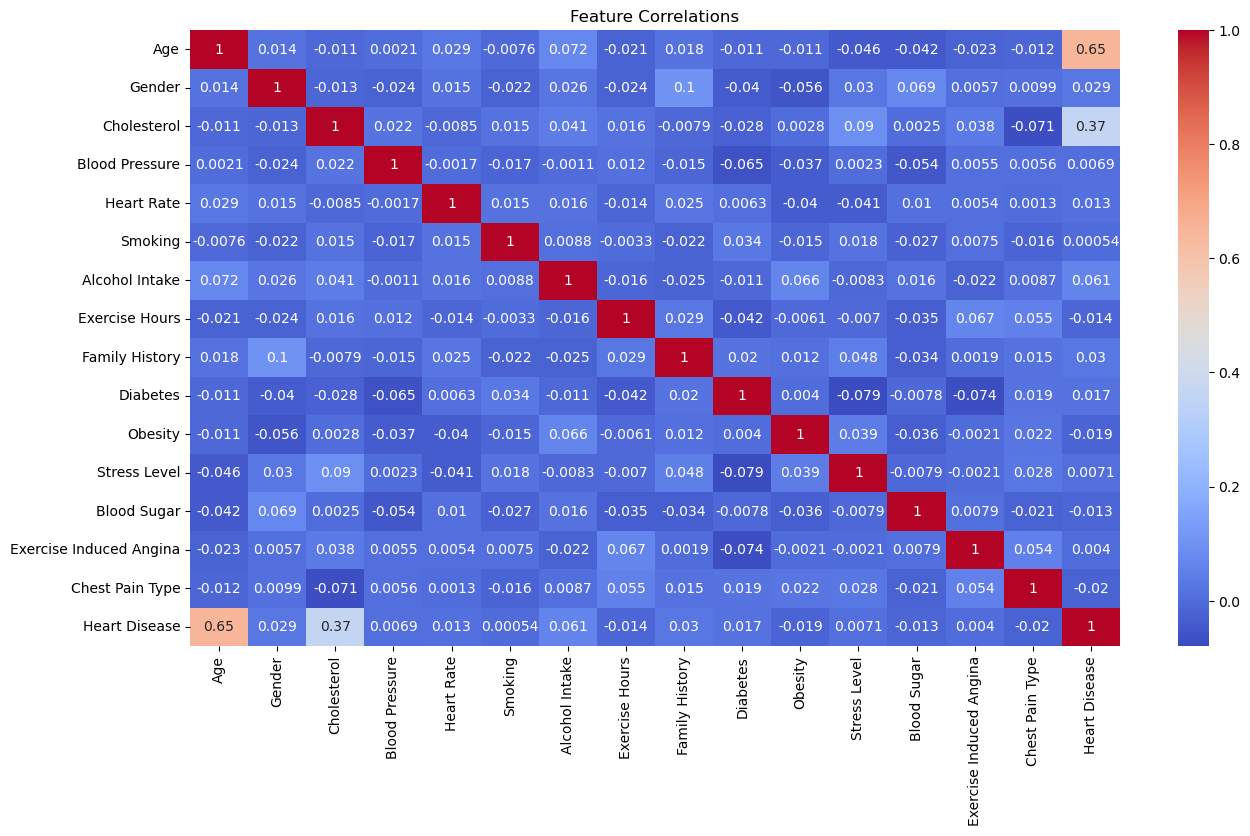

In [20]:
#Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

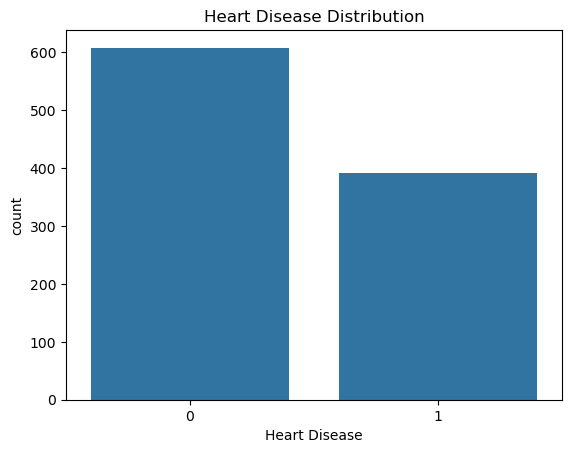

In [21]:
# Target distribution
sns.countplot(x='Heart Disease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

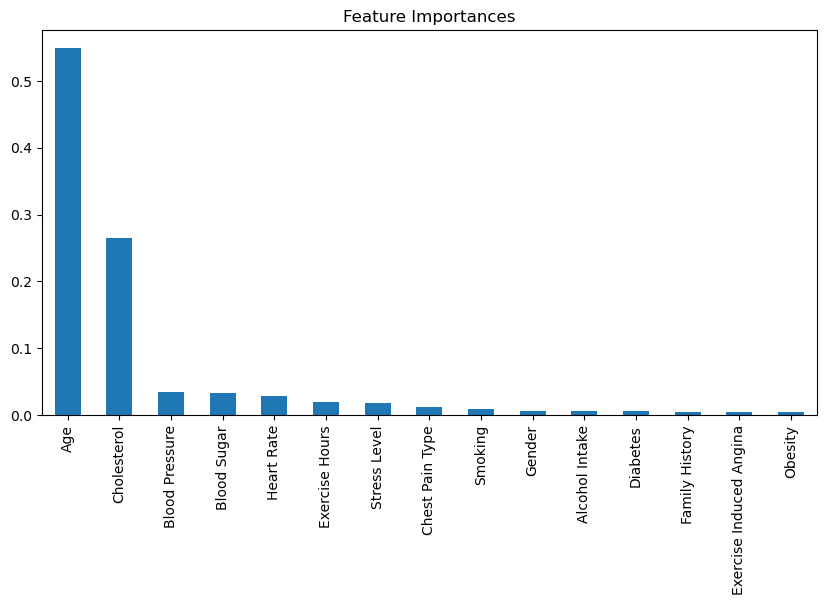

In [22]:
#Feature Engineering & Selection
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, y)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importances")
plt.show()


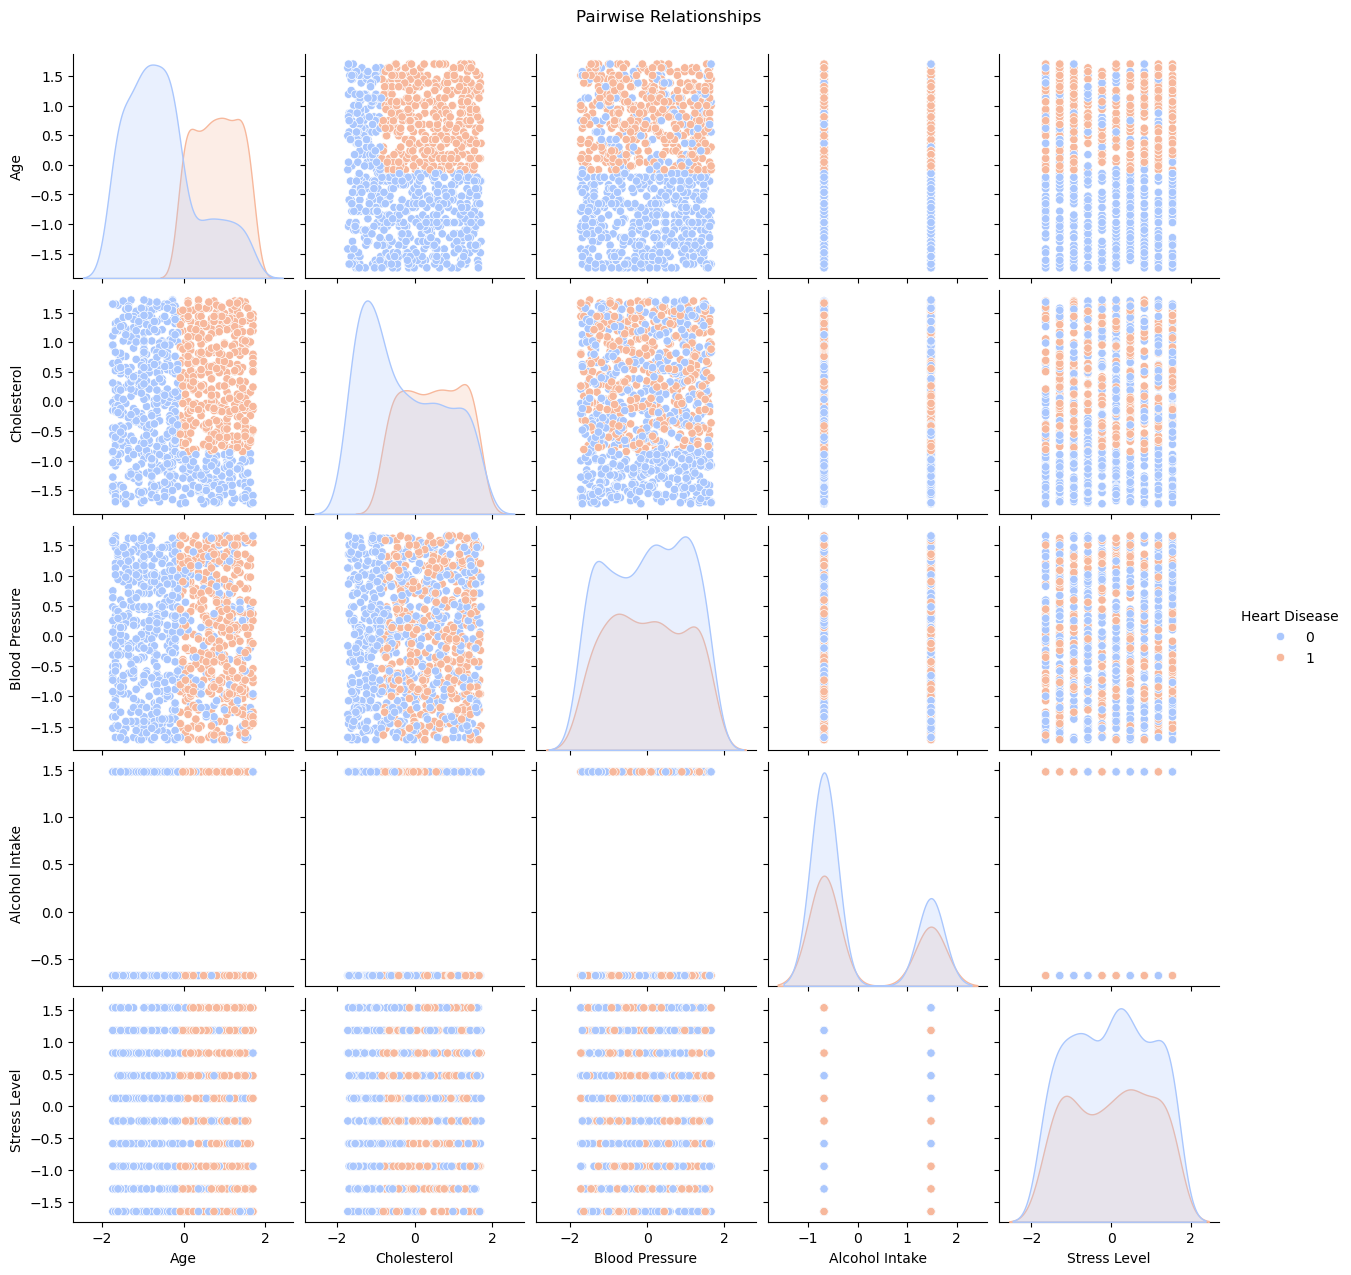

In [23]:
selected_features = ['Age', 'Cholesterol', 'Blood Pressure','Alcohol Intake', 'Stress Level', 'Heart Disease']
sns.pairplot(df[selected_features], hue='Heart Disease', palette='coolwarm')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [24]:
#Model Training
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (800, 15) (800,)
Test shape: (200, 15) (200,)


In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [27]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [28]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

models = {'Logistic Regression': logreg, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.86
Precision: 0.8375
Recall: 0.8170731707317073
F1 Score: 0.8271604938271605
ROC-AUC: 0.9569036792062836
Confusion Matrix:
 [[105  13]
 [ 15  67]]

=== Decision Tree ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Confusion Matrix:
 [[118   0]
 [  0  82]]

=== Random Forest ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Confusion Matrix:
 [[118   0]
 [  0  82]]


In [29]:
#Model Tuning (using GridSearchCV)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best Score: 0.9974999999999999


In [30]:
def test_model(model, X_test, y_test):
    """
    Evaluate a trained classification model on test data.
    Prints metrics and shows confusion matrix + ROC curve.
    """
    # Predictions
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = y_pred  # fallback if model doesn’t support probabilities
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

Accuracy:  0.9900
Precision: 1.0000
Recall:    0.9744
F1 Score:  0.9870
ROC-AUC:   1.0000

Confusion Matrix:
 [[122   0]
 [  2  76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.97      0.99        78

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



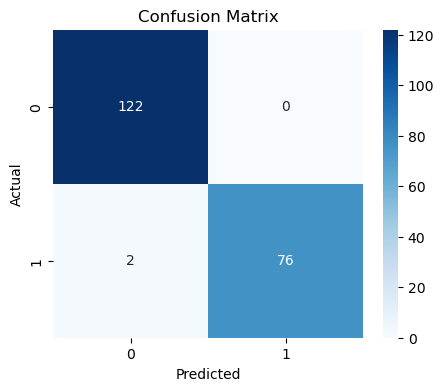

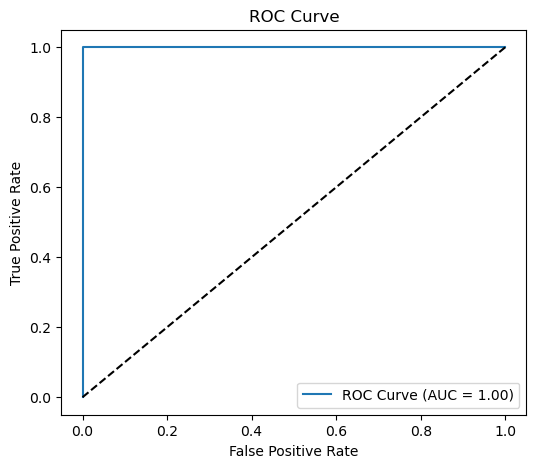

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Ensure X and y are defined from the final preprocessed DataFrame
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

# Split again to avoid stale variables
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# GridSearchCV to tune Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best Model
best_model = grid.best_estimator_

# Evaluate
test_model(best_model, X_test, y_test)


In [32]:
import joblib

joblib.dump(model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

In [36]:
# Step 1: Sample input
sample_dict = {
    "Age": [79],
    "Gender": ["Male"],
    "Cholesterol": [151],
    "Blood Pressure": [179],
    "Heart Rate": [81],
    "Smoking": ["Never"],
    "Alcohol Intake": ["Moderate"],
    "Exercise Hours": [4],
    "Family History": ["Yes"],
    "Diabetes": ["No"],
    "Obesity": ["Yes"],
    "Stress Level": [8],
    "Blood Sugar": [189],
    "Exercise Induced Angina": ["Yes"],
    "Chest Pain Type": ["Asymptomatic"]
}
sample_df = pd.DataFrame(sample_dict)

# Step 2: Apply encoders
categorical_cols = [
    "Gender", "Smoking", "Alcohol Intake", "Family History",
    "Diabetes", "Obesity", "Exercise Induced Angina", "Chest Pain Type"
]

for col in categorical_cols:
    le = joblib.load(f"le_{col.lower().replace(' ', '_')}.pkl")
    sample_df[col] = sample_df[col].str.strip().str.lower()
    if isinstance(le.classes_[0], str):
        mapping = {cls.lower(): le.transform([cls])[0] for cls in le.classes_}
    else:
        print(f"Warning: LabelEncoder for {col} was trained on numeric data.")
        mapping = {}  # fallback

    sample_df[col] = sample_df[col].map(mapping)

# Step 3: Scale the full sample_df
scaler = joblib.load("scaler.pkl")
sample_df_scaled = pd.DataFrame(scaler.transform(sample_df), columns=sample_df.columns)

# Step 4: Predict
model = joblib.load("heart_disease_model.pkl")
prediction = model.predict(sample_df_scaled)
print("Prediction:", prediction)


Prediction: [0]
